## Regularización

Que es?
- La regularización es cualquier modificación que hacemos a un algoritmo de aprendizaje que tiene como objetivo reducir su error de generalización (osea el del test set) pero no su error de entrenamiento.
- Es probable que al aplicar regularización, se incremente el error en el training set, pero también esperamos bajarlo en el test set.
- La regularización busca reducir el overfitting, y se espera que el algoritmo se comporte mejor (mejor fit) con datos nunca vistos.
- Los dos tipos mas comunes son regularización L1 Laplace y L2 Gaussiana. Ambos métodos buscan reducir el tamano de los coeficientes a través de las interaciones. En el caso de regresión logística, esta penalización se realiza en la función del costo y en el gradiente.

### Funcion del Gradiente de Logistic Regression

def grads($x, y, b_i, b_0$)
- $fval = b_i^TX + b_0$
- $ypred = sig(fval)$
- $err' = bce'(y,ypred)$
- $fval' = sig'(fval)$
- $b_i =  \sum (err' * fval', x)$
- $b_0 =  \sum (err' * fval')$
- $devuelve(b_i, b_0)$


### Regularización L1 - Lasso

def grads($x, y, b_i, b_0$)
- $fval = b_i^TX + b_0$
- $ypred = sig(fval)$
- $err' = bce'(y,ypred) + [\frac{\lambda}{2m} * \sum(|b_i|) + b_0]$
- $fval' = sig'(fval)$
- $b_i =  \sum (err' * fval', x) - [\frac{\lambda}{m} * b_i]$
- $b_0 =  \sum (err' * fval')$
- $devuelve(b_i, b_0)$

### Regularización L2 - Ridge

def grads($x, y, b_i, b_0$)
- $fval = b_i^TX + b_0$
- $ypred = sig(fval)$
- $err' = bce'(y,ypred) + [\frac{\lambda}{2m} * \sum(b_i^2) + b_0^2]$
- $fval' = sig'(fval)$
- $b_i =  \sum (err' * fval', x) - [\frac{\lambda}{m} * b_i]$
- $b_0 =  \sum (err' * fval')$
- $devuelve(b_i, b_0)$

In [1]:
# Cargamos nuestras bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt

# Carga el dataset de los lirios
l_petalo = [2,2.5,1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4, 4.9, 4.7, 4.3, 4.4, 4.8, 5, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4, 4.4, 4.6, 4, 3.3, 4.2, 4.2, 4.2, 4.3, 3, 4.1, 6, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5, 5.1, 5.3, 5.5, 6.7, 6.9, 5, 5.7, 4.9, 6.7, 4.9, 5.7, 6, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5, 5.2, 5.4, 5.1]
a_petalo = [2,0.5,0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1, 1.3, 1.4, 1, 1.5, 1, 1.4, 1.3, 1.4, 1.5, 1, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1, 1.1, 1, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2, 1.9, 2.1, 2, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2, 2, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2, 2.3, 1.8]
especie = ['setosa','setosa','setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']

# Creamos una matriz de diseño con las variables independientes
datos_x = np.array((l_petalo, a_petalo)).transpose()

# seed  = 42
np.random.seed(42)

In [2]:
# Codificamos el vector 'especie' para los tres clasificadores distintos
especie_setosa = np.array([1.0 if x=='setosa' else 0.0 for x in especie])

In [3]:
# Función sigmoide y su derivada
def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

def d_sig(x):
    return sig(x) * (1.0 - sig(x))

# Función de error y su derivada
def bce(y_real, y_pred):
    return np.sum(-y_real*np.log(y_pred) - (1.0 - y_real) * np.log(1.0 - y_pred))

def d_bce(y_real, y_pred):
    return (y_pred - y_real) / (y_pred * (1.0-y_pred))

# Cálculo de gradientes
def grads(x, y_real, cur_bi, cur_b0):    
    f_val = np.dot(x, cur_bi) + cur_b0
    y_pred = sig(f_val)
    d_err = d_bce(y_real, y_pred)
    d_f_val = d_sig(f_val)
    d_bi = np.dot(d_err * d_f_val, x)
    d_b0 = np.sum(d_err * d_f_val)
    return (d_bi, d_b0)

# Función de optimización con gradiente descendiente
def gd(x, y, lr=0.001, num_iter=1000):
    M = x.shape[1]
    bi = np.random.randn(M)
    [b0] = np.random.randn(1)
    errs = []
    
    for ix in range(num_iter):
        pred = sig(np.dot(x, bi) + b0)
        err = bce(y, pred)
        (d_bi, d_b0) = grads(x, y, bi, b0)
        bi = bi - lr * d_bi
        b0 = b0 - lr * d_b0
        errs.append(err)
        
    return (errs,bi,b0)

error: 6.965509736789073


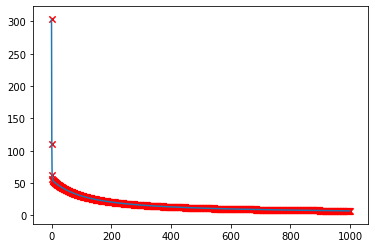

In [4]:
# se entrena el modelo para detectar la clase setosa (unicamente)
(errs_setosa, bi_setosa, b0_setosa) = gd(datos_x, especie_setosa)

# Graficamos las tres curvas de error a través de las iteraciones
plt.plot(errs_setosa)
plt.scatter(np.arange(0, 1000), errs_setosa, s=40, c="red", marker='x')
print("error:",errs_setosa[len(errs_setosa)-1])

In [5]:
# Función de predicción (probabilidad) para un clasificador por separado
def prob_uno(params, l_petalo, a_petalo):
    
    # saquemos los parámetros
    (bi, b0) = params
    
    # construyamos un vector de valores para predecir
    vec = np.array([l_petalo, a_petalo])
    
    return sig(np.dot(bi, vec) + b0)

# Función de predicción (etiqueta) para los tres clasificadores juntos
def predict(l_petalo, a_petalo):
    
    # saquemos los conjuntos de parámetros
    params_setosa = (bi_setosa, b0_setosa)
    
    # evaluamos las tres funciones por separado
    prob_setosa = prob_uno(params_setosa, l_petalo, a_petalo)
    
    return 1.0 if prob_setosa > 0.5 else 0.0   

In [6]:
y_prima = np.array([predict(x[0],x[1]) for x in datos_x])

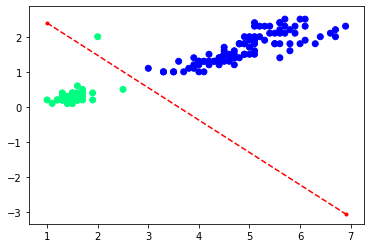

In [7]:
# Definicion de coordinadas estimadas de la barrera de desicion.
plot_x_n = np.array([min(datos_x[:,0]), max(datos_x[:,0])])
plot_y_n = (-1/bi_setosa[0]) * (bi_setosa[1] * plot_x_n + b0_setosa)

plt.plot(plot_x_n, plot_y_n, '.--', c = "red")
plt.scatter(datos_x[:,0],datos_x[:,1], c = especie_setosa, cmap= "winter")

In [8]:
acc = np.sum((y_prima == especie_setosa) * 1) / len(especie_setosa)
print("Exactitud sin Regularizacion:", acc * 100,"%")

Exactitud sin Regularizacion: 99.3421052631579 %


## Regularizacion L2

In [9]:
# parametros de regularizacion
lamb = 0.05
m = datos_x.shape[0]

# Cálculo de gradientes
def grads(x, y_real, cur_bi, cur_b0):
    
    # penalizacion al costo -lambda/2m * sum(betas al cuadrado)
    bce_reg = (lamb/(2*m) * (np.sum(cur_bi**2)+cur_b0**2))
    
    f_val = np.dot(x, cur_bi) + cur_b0
    y_pred = sig(f_val)
    
    # se aplica penalizacion
    d_err = d_bce(y_real, y_pred) + bce_reg
    d_f_val = d_sig(f_val)
    
    # penalizacion al gradiente bi
    grad_reg = (lamb/m * cur_bi)
    
    # se aplica penalizacion
    d_bi = np.dot(d_err * d_f_val, x) - grad_reg
    d_b0 = np.sum(d_err * d_f_val)
    return (d_bi, d_b0)

error: 7.678892828971839


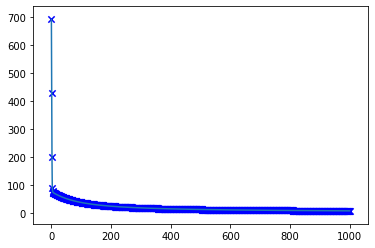

In [10]:
y_prima = np.array([predict(x[0],x[1]) for x in datos_x])

# se entrena el modelo para detectar la clase setosa (unicamente)
(errs_setosa, bi_setosa, b0_setosa) = gd(datos_x, especie_setosa)

# Graficamos las tres curvas de error a través de las iteraciones
plt.plot(errs_setosa)
plt.scatter(np.arange(0, 1000), errs_setosa, s=40, c="blue", marker='x')
print("error:",errs_setosa[len(errs_setosa)-1])

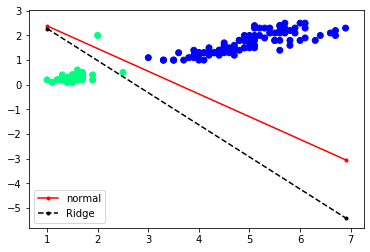

In [12]:
# Definicion de coordinadas estimadas de la barrera de desicion.
plot_x_l2 = np.array([min(datos_x[:,0]), max(datos_x[:,0])])
plot_y_l2 = (-1/bi_setosa[0]) * (bi_setosa[1] * plot_x_l2 + b0_setosa)

plt.plot(plot_x_n, plot_y_n, '.-', c = "red", label = "normal")
plt.plot(plot_x_l2, plot_y_l2, '.--', c = "black", label = "Ridge") # con regularizacion
plt.scatter(datos_x[:,0],datos_x[:,1], c = especie_setosa, cmap= "winter")
plt.legend()


In [13]:
acc = np.sum((y_prima == especie_setosa) * 1) / len(especie_setosa)
print("Exactitud Con Regularizacion L2:", acc * 100,"%")

Exactitud Con Regularizacion L2: 99.3421052631579 %


## Regularización L1


In [14]:
# parametros de regularizacion
lamb = 0.05
m = datos_x.shape[0]

# Cálculo de gradientes
def grads(x, y_real, cur_bi, cur_b0):
    
    # penalizacion al costo -lambda/2m * sum(betas al cuadrado)
    bce_reg = (lamb/(2*m) * (np.sum(cur_bi)+cur_b0))
    
    f_val = np.dot(x, cur_bi) + cur_b0
    y_pred = sig(f_val)
    
    # se aplica penalizacion
    d_err = d_bce(y_real, y_pred) + bce_reg
    d_f_val = d_sig(f_val)
    
    # penalizacion al gradiente bi
    grad_reg = (lamb/m * cur_bi)
    
    # se aplica penalizacion
    d_bi = np.dot(d_err * d_f_val, x) - grad_reg
    d_b0 = np.sum(d_err * d_f_val)
    return (d_bi, d_b0)

error: 7.20469435602878


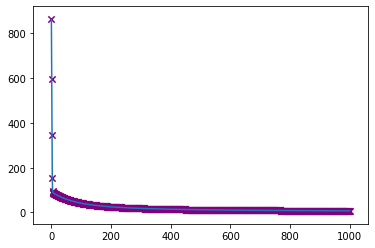

In [15]:
y_prima = np.array([predict(x[0],x[1]) for x in datos_x])

# se entrena el modelo para detectar la clase setosa (unicamente)
(errs_setosa, bi_setosa, b0_setosa) = gd(datos_x, especie_setosa)

# Graficamos las tres curvas de error a través de las iteraciones
plt.plot(errs_setosa)
plt.scatter(np.arange(0, 1000), errs_setosa, s=40, c="purple", marker='x')
print("error:",errs_setosa[len(errs_setosa)-1])

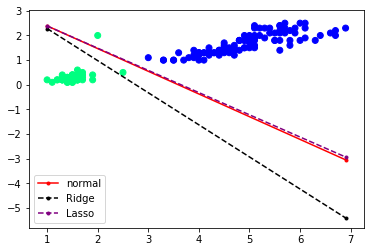

In [16]:
# Definicion de coordinadas estimadas de la barrera de desicion.
plot_x_l1 = np.array([min(datos_x[:,0]), max(datos_x[:,0])])
plot_y_l1 = (-1/bi_setosa[0]) * (bi_setosa[1] * plot_x_l1 + b0_setosa)

plt.plot(plot_x_n, plot_y_n, '.-', c = "red", label = "normal")
plt.plot(plot_x_l2, plot_y_l2, '.--', c = "black", label = "Ridge") # con regularizacion
plt.plot(plot_x_l1, plot_y_l1, '.--', c = "purple", label = "Lasso") # con regularizacion
plt.scatter(datos_x[:,0],datos_x[:,1], c = especie_setosa, cmap= "winter")
plt.legend()
